In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



**Train Dataset**

In [ ]:
# Importing dataset

s_train=pd.read_csv("/content/SalaryData_Train.csv")
s_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# checking the duplicate values, if any

sal_train=s_train.drop_duplicates()
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
from sklearn import preprocessing

# Converting the categorical data numerical by preprocessing with label encoding

le=LabelEncoder()

sal_train["workclass"]=le.fit_transform(sal_train["workclass"])
sal_train["education"]=le.fit_transform(sal_train["education"])
sal_train["maritalstatus"]=le.fit_transform(sal_train["maritalstatus"])
sal_train["occupation"]=le.fit_transform(sal_train["occupation"])
sal_train["relationship"]=le.fit_transform(sal_train["relationship"])
sal_train["race"]=le.fit_transform(sal_train["race"])
sal_train["sex"]=le.fit_transform(sal_train["sex"])
sal_train["native"]=le.fit_transform(sal_train["native"])
sal_train["Salary"]=le.fit_transform(sal_train["Salary"])

In [ ]:
# Cheking if all columns  are converted to int

sal_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            26903 non-null  int64
 1   workclass      26903 non-null  int64
 2   education      26903 non-null  int64
 3   educationno    26903 non-null  int64
 4   maritalstatus  26903 non-null  int64
 5   occupation     26903 non-null  int64
 6   relationship   26903 non-null  int64
 7   race           26903 non-null  int64
 8   sex            26903 non-null  int64
 9   capitalgain    26903 non-null  int64
 10  capitalloss    26903 non-null  int64
 11  hoursperweek   26903 non-null  int64
 12  native         26903 non-null  int64
 13  Salary         26903 non-null  int64
dtypes: int64(14)
memory usage: 3.1 MB


In [ ]:
# Cheking if there are any null values

sal_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

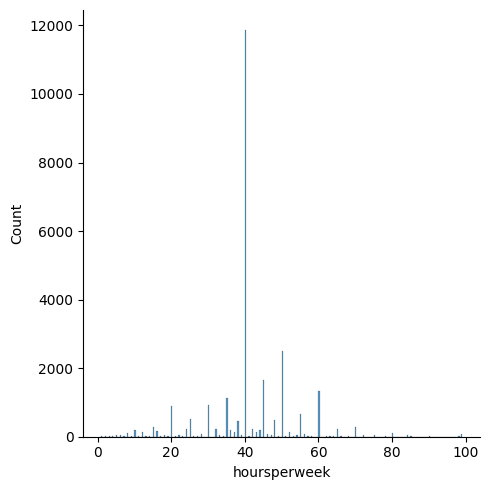

In [ ]:
# Visualising the hour per week by distribution plot

sns.displot(sal_train["hoursperweek"])

**Test Dataset**

In [ ]:
# Importing test data

s_test=pd.read_csv("/content/SalaryData_Test.csv")
s_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
# Checking duplicate values.

sa_test=s_test.drop_duplicates()
sa_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
# Checking the information of test data

sa_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  object
 2   education      14130 non-null  object
 3   educationno    14130 non-null  int64 
 4   maritalstatus  14130 non-null  object
 5   occupation     14130 non-null  object
 6   relationship   14130 non-null  object
 7   race           14130 non-null  object
 8   sex            14130 non-null  object
 9   capitalgain    14130 non-null  int64 
 10  capitalloss    14130 non-null  int64 
 11  hoursperweek   14130 non-null  int64 
 12  native         14130 non-null  object
 13  Salary         14130 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
## Label encoding
# Preprocessing the data to convert categorical data in numeric

sa_test["workclass"]=le.fit_transform(sa_test["workclass"])
sa_test["education"]=le.fit_transform(sa_test["education"])
sa_test["maritalstatus"]=le.fit_transform(sa_test["maritalstatus"])
sa_test["occupation"]=le.fit_transform(sa_test["occupation"])
sa_test["relationship"]=le.fit_transform(sa_test["relationship"])
sa_test["race"]=le.fit_transform(sa_test["race"])
sa_test["sex"]=le.fit_transform(sa_test["sex"])
sa_test["native"]=le.fit_transform(sa_test["native"])
sa_test["Salary"]=le.fit_transform(sa_test["Salary"])
sa_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [ ]:

sa_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int64
 2   education      14130 non-null  int64
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int64
 5   occupation     14130 non-null  int64
 6   relationship   14130 non-null  int64
 7   race           14130 non-null  int64
 8   sex            14130 non-null  int64
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int64
 13  Salary         14130 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [ ]:
# Checking if there are null  values

sa_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

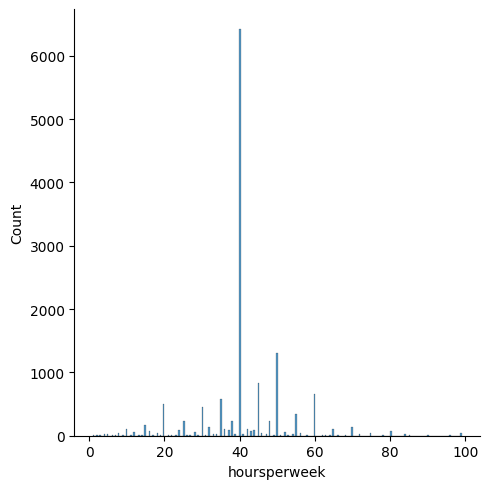

In [ ]:
#Visualising the hoursperweek

sns.displot(sa_test["hoursperweek"])

In [ ]:
#Applying Train and Test split on Salary Dataset

x_train=sal_train.iloc[:,0:13]
y_train=sal_train.iloc[:,-1] # Exclusding the dependent  Y variable i.e- Salary

In [ ]:
x_test=sa_test.iloc[:,0:13]
y_test=sa_test.iloc[:,-1] # Exclusding the dependent  Y variable i.e- Salary

# **Naive Bayes Classification** :






**1.Buliding model by MultinomialNB**


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
m_pred=mnb.predict(x_train)

print(mnb.score(x_train,y_train)) # Train Accuracy
print(mnb.score(x_test,y_test)) # Test Accuracy

0.7683158012117608
0.7733899504600141


**2.Buliding model by CategoricalNB**

In [ ]:
from sklearn.naive_bayes import CategoricalNB

cnb=CategoricalNB()
cnb.fit(x_train,y_train)
y_cnb=cnb.predict(x_train)

print(cnb.score(x_train,y_train)) #Train Accuracy
print(cnb.score(x_test,y_test)) #Test Accuracy

0.8539196372151805
0.853927813163482



**3.Buliding model by GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_train)

print(gnb.score(x_train,y_train)) #Train Accuracy
print(gnb.score(x_test,y_test)) #Test Accuracy

0.7933687692822362
0.7951875442321302


# **After applying all the Naive bayes we found out that CategoricalNB gives the higest Accuracy of 85%**